In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
class EnzymeKinetics:
    def __init__(self, k1, k2, k3, k4, k5, S0, E0, A0, P0, I0, B0):
        self.k1 = k1
        self.k2 = k2
        self.k3 = k3
        self.k4 = k4
        self.k5 = k5
        
        self.S = [S0]
        self.E = [E0]
        self.A = [A0]
        self.P = [P0]
        self.I = [I0]
        self.B = [B0]
    
    def euler(self, dt):
        S = self.S[-1] + dt*(-self.k1*self.S[-1]*self.E[-1] + self.k2*self.A[-1])
        E = self.E[-1] + dt*(-self.k1*self.S[-1]*self.E[-1] + self.k2*self.A[-1] + self.k3*self.A[-1] - self.k4*self.E[-1]*self.I[-1] + self.k5*self.B[-1])
        A = self.A[-1] + dt*(self.k1*self.S[-1]*self.E[-1] - self.k2*self.A[-1] - self.k3*self.A[-1])
        P = self.P[-1] + dt*(self.k3*self.A[-1])
        I = self.I[-1] + dt*(-self.k4*self.E[-1]*self.I[-1] + self.k5*self.B[-1])
        B = self.B[-1] + dt*(self.k4*self.E[-1]*self.I[-1] - self.k5*self.B[-1])
        self.S.append(S)
        self.E.append(E)
        self.A.append(A)
        self.P.append(P)
        self.I.append(I)
        self.B.append(B)
        return self.S, self.E, self.A, self.P, self.I, self.B

        

In [25]:
N = 100 # number of intervalls.
tMax = 60.0 #seconds.
t = np.linspace(0,tMax,N)
dt = tMax/N

In [50]:
def plot1():
    plt.plot(t, EK.S, label="[S]")
    plt.plot(t, EK.E, label="[E]")
    plt.plot(t, EK.A, label="[A]")
    plt.plot(t, EK.P, label="[P]")
    plt.legend()
    print("Slutkoncentration av Produkt " + str(EK.P[-1]))
    print("Slutkoncentration av Substrat " + str(EK.S[-1]))
    print("Slutkoncentration av Enzym " + str(EK.E[-1]))
    print("Slutkoncentration av Enzym-Substratkomplex " + str(EK.A[-1]))
    print("Slutkoncentration av Enzym-Inhibitorkomplex " + str(EK.B[-1]))
    print("Slutkoncentration av Inhibitor " + str(EK.I[-1]))

In [51]:
def plot2():
    plt.plot(t, EK.S, label="[S]")
    plt.plot(t, EK.E, label="[E]")
    plt.plot(t, EK.A, label="[A]")
    plt.plot(t, EK.P, label="[P]")
    plt.plot(t, EK.B, label="[B]")
    plt.plot(t, EK.I, label="[I]")
    plt.legend()
    print("Slutkoncentration av Produkt " + str(EK.P[-1]))
    print("Slutkoncentration av Substrat " + str(EK.S[-1]))
    print("Slutkoncentration av Enzym " + str(EK.E[-1]))
    print("Slutkoncentration av Enzym-Substratkomplex " + str(EK.A[-1]))
    print("Slutkoncentration av Enzym-Inhibitorkomplex " + str(EK.B[-1]))
    print("Slutkoncentration av Inhibitor " + str(EK.I[-1]))

Första simuleringen för Modell utan inhibitor

In [73]:
EK = EnzymeKinetics(4000,0.001,0.015,4000,(5.32*10**-6),(14*10**-6),(90*10**-9),10**-5,10**-5,0,0)

for i in range(N-1):
    EK.euler(dt)

Slutkoncentration av Produkt 1.730607026166851e-05
Slutkoncentration av Substrat 9.29774101511939e-06
Slutkoncentration av Enzym 2.693811276787892e-06
Slutkoncentration av Enzym-Substratkomplex 7.396188723212106e-06
Slutkoncentration av Enzym-Inhibitorkomplex 0.0
Slutkoncentration av Inhibitor 0.0


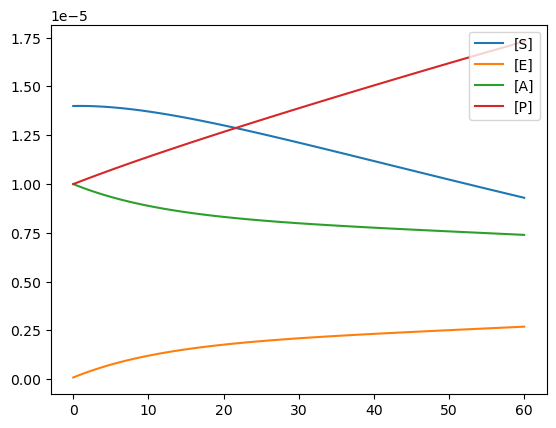

In [74]:
plot1()

Första simuleringen med värden given av projektplan för Modell med inhibitor

In [75]:
EK = EnzymeKinetics(4000,0.001,0.015,4000,(5.32*10**-6),(14*10**-6),(90*10**-9),1*10**-5,1*10**-5,(1.33*10**-9),0)

for i in range(N-1):
    EK.euler(dt)

Slutkoncentration av Produkt 1.7305999045548818e-05
Slutkoncentration av Substrat 9.298018433464626e-06
Slutkoncentration av Enzym 2.693535396897663e-06
Slutkoncentration av Enzym-Substratkomplex 7.395982520986549e-06
Slutkoncentration av Enzym-Inhibitorkomplex 4.820821157829237e-10
Slutkoncentration av Inhibitor 8.479178842170757e-10


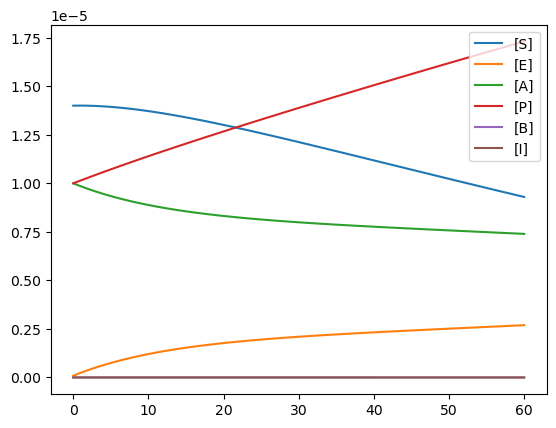

In [77]:
plot2()

Vi ser av simuleringen ovan att inhibitorkoncentrationen är för låg för att påverka systemet. Vi testar att öka den

Slutkoncentration av Produkt 1.7237199329351237e-05
Slutkoncentration av Substrat 9.565235030301106e-06
Slutkoncentration av Enzym 2.435429180768023e-06
Slutkoncentration av Enzym-Substratkomplex 7.197565640347665e-06
Slutkoncentration av Enzym-Inhibitorkomplex 4.570051788843146e-07
Slutkoncentration av Inhibitor 8.729948211156856e-07


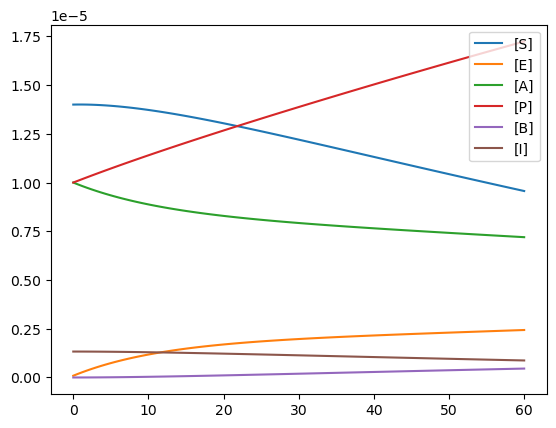

In [83]:
EK = EnzymeKinetics(4000,0.001,0.015,4000,(5.32*10**-6),(14*10**-6),(90*10**-9),1*10**-5,1*10**-5,(1.33*10**-6),0)

for i in range(N-1):
    EK.euler(dt)

plot2()